Text(0.5, 0.01, 'log(stiffness ratio)')

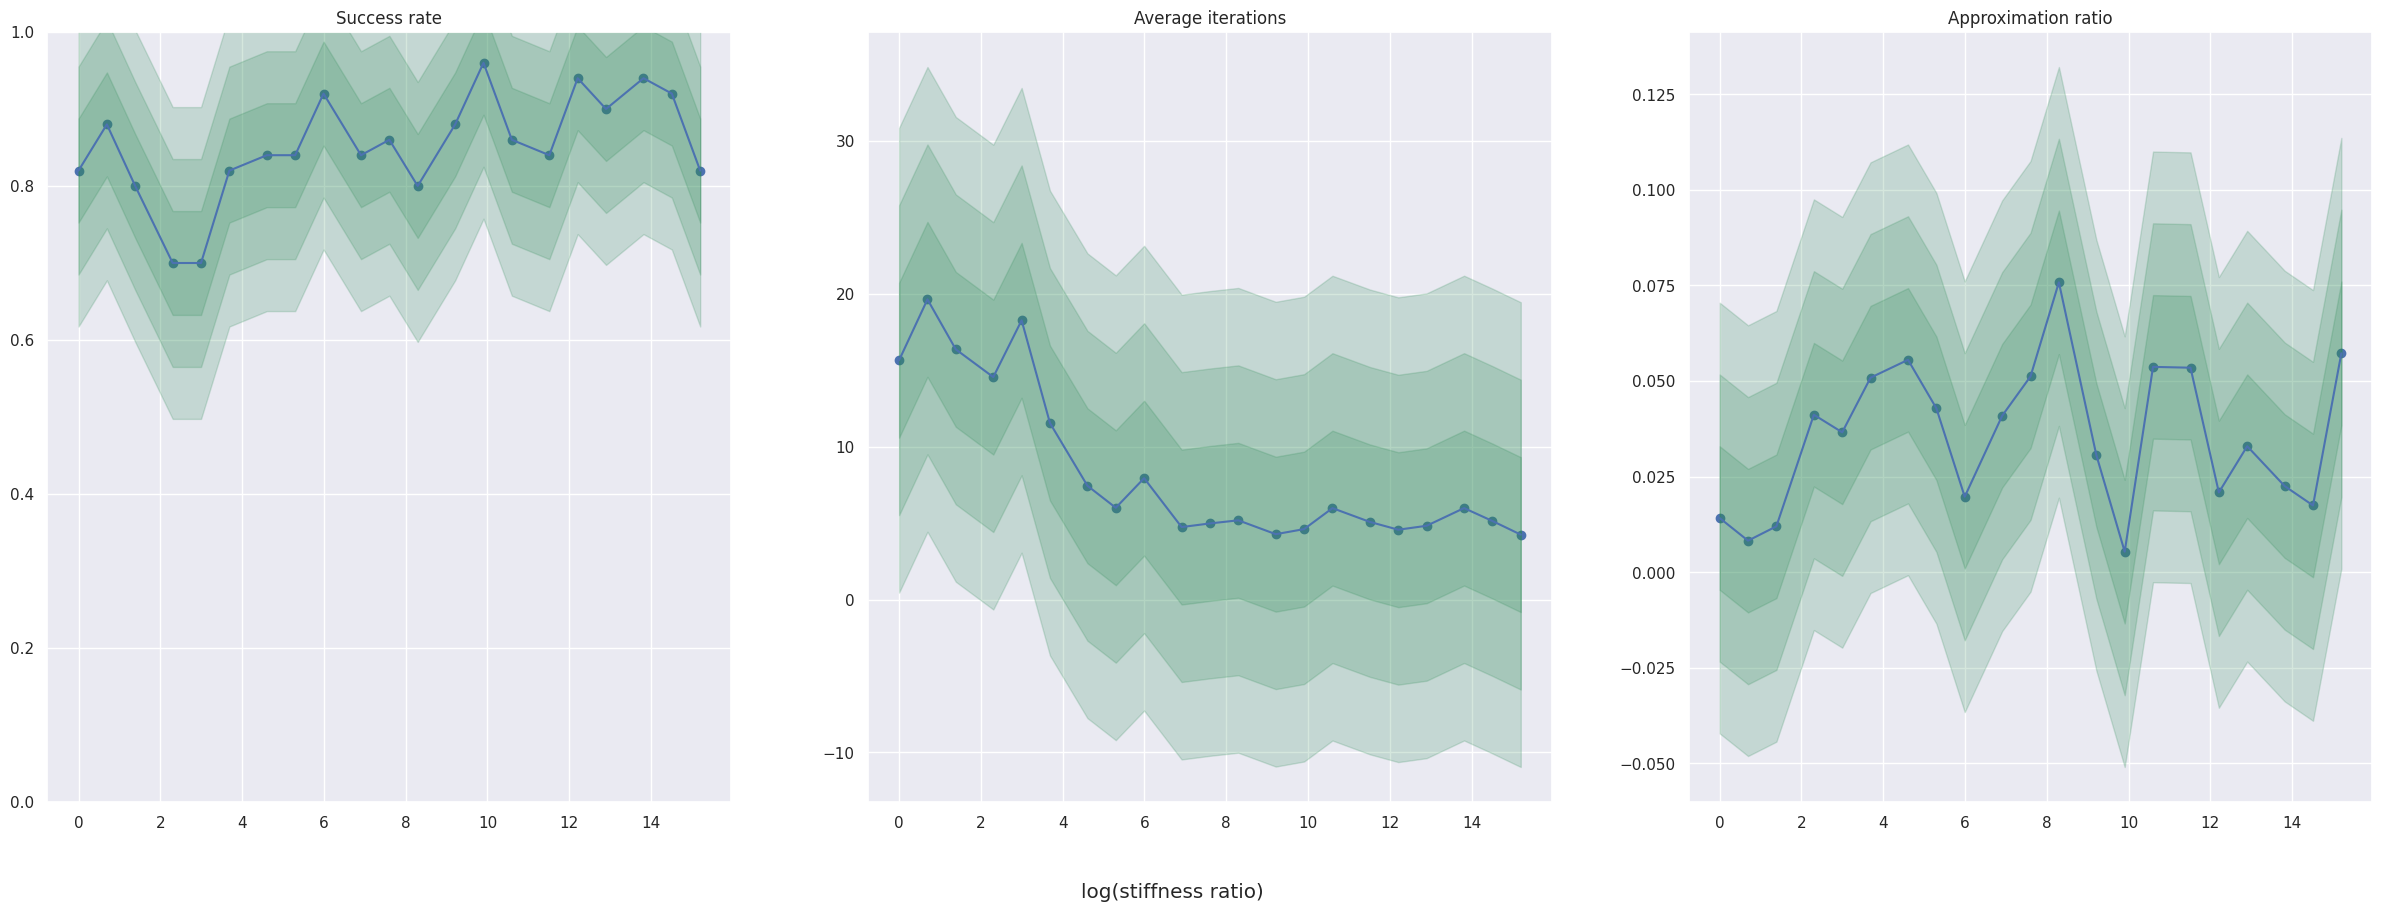

In [22]:
import seaborn as sns
from matplotlib import pyplot as plt 
import pandas as pd
import numpy as np
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

sns.set_theme(style = 'darkgrid')



sr_plot = axs[0]
its_plot = axs[1] 
approx_plot = axs[2]

success_rates = []
average_its = [] 
approx_ratios = []

stepsize = 0.25
shots = 1000
ansatz = 'CIA'

size = 10
stiffs_1 = [1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6]
stiffs_2 = [2 * 1e0, 2 * 1e1, 2 * 1e2, 2 * 1e3, 2 * 1e4, 2 * 1e5, 2 * 1e6]
stiffs_3 = [4 * 1e0, 4 * 1e1, 4 * 1e2, 4 * 1e3, 4 * 1e4, 4 * 1e5, 4 * 1e6]

stiffs = [1e0, 2 * 1e0, 4 * 1e0, 1e1, 2 * 1e1, 4 * 1e1, 1e2, 2 * 1e2, 4 * 1e2, 1e3, 2 * 1e3, 4 * 1e3, 1e4, 2 * 1e4, 4 * 1e4, 1e5, 2 * 1e5, 4 * 1e5, 1e6, 2 * 1e6, 4 * 1e6]
trainset_1 = pd.read_csv(f'data/stiffness/Stiffness_size_{size}_stiffs_{stiffs_1}_ansatz_{ansatz}_stepsize_{stepsize}_shots_{shots}.csv')

trainset_2 = pd.read_csv(f'data/stiffness/Stiffness_size_{size}_stiffs_{stiffs_2}_ansatz_{ansatz}_stepsize_{stepsize}_shots_{shots}.csv')

trainset_3 = pd.read_csv(f'data/stiffness/Stiffness_size_{size}_stiffs_{stiffs_3}_ansatz_{ansatz}_stepsize_{stepsize}_shots_{shots}.csv')

stiffs_1 = np.array(stiffs_1)
stiffs_2 = np.array(stiffs_2)
stiffs_3 = np.array(stiffs_3)

trainset = pd.concat([trainset_1, trainset_2, trainset_3])
for stiff in stiffs: 

    sub_trainset = trainset[trainset['Stiffness (flt)'] == stiff]

    #sr = len(sub_trainset[sub_trainset['Train (flt)'] == sub_trainset['Test (flt)']]) / len(sub_trainset) 
    sr = len(sub_trainset[sub_trainset['Train_iterations_1 (int)'] != -1]) / len(sub_trainset) 
    # its_1 = np.array(sub_trainset['Train_iterations_1 (int)'])
    # its_2 = np.array(sub_trainset['Train_iterations_2 (int)'])
    # its_3 = np.array(sub_trainset['Train_iterations_3 (int)'])
    # barens = np.array(sub_trainset['Baren (int)'])

    #print(np.maximum(np.maximum(np.maximum(its_1, its_2), its_3), barens))
    iterations = np.mean(sub_trainset[sub_trainset['Train (flt)'] == sub_trainset['Test (flt)']]['Train_iterations (int)'])
    approximation = np.abs(np.mean((sub_trainset['Test (flt)'] - sub_trainset['Train (flt)']) / sub_trainset['Test (flt)']))

    success_rates.append(sr)
    average_its.append(iterations)
    approx_ratios.append(approximation)

logstiffs = np.log(stiffs)

alpha = 0.2

sr_plot.scatter(logstiffs, success_rates)
sr_plot.plot(logstiffs, success_rates)
sr_plot.set_title('Success rate')
for i in range(1, 4):
    sr_plot.fill_between(logstiffs, success_rates - i * np.std(success_rates), success_rates + i * np.std(success_rates), alpha = alpha, color = 'seagreen')

sr_plot.set_ylim(0, 1)
# sr_plot.set_ylim(0, 1)

its_plot.scatter(logstiffs, average_its)
its_plot.plot(logstiffs, average_its)
its_plot.set_title('Average iterations')
for i in range(1, 4):
    its_plot.fill_between(logstiffs, average_its - i * np.std(average_its), average_its + i * np.std(average_its), alpha = alpha, color = 'seagreen')

# its_plot.set_ylim(min(average_its), max(average_its))

# its_plot.set_ylim(min(trainset['Train_Ierations (int)'], 0))

approx_plot.scatter(logstiffs, approx_ratios)
approx_plot.plot(logstiffs, approx_ratios)
approx_plot.set_title('Approximation ratio')
for i in range(1, 4):
    approx_plot.fill_between(logstiffs, approx_ratios - i * np.std(approx_ratios), approx_ratios + i * np.std(approx_ratios), alpha = alpha, color = 'seagreen')

# approximations = np.abs((np.array(trainset['Train (flt)']) - np.array(trainset['Test (flt)'])) / np.array(trainset['Test (flt)']))[1:]
# print(approximations)
# approx_plot.set_ylim(np.min(approximations), np.max(approximations))

fig.supxlabel('log(stiffness ratio)')


# success_rates = []
# average_its = [] 
# approx_ratios = []

# stepsize = 0.25
# shots = 10000
# ansatz = 'MA-PIA'

# size = 10
# stiffs = [1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6]
# trainset = pd.read_csv(f'data/stiffness/Stiffness_size_{size}_stiffs_{stiffs}_ansatz_{ansatz}_stepsize_{stepsize}_shots_{shots}.csv')


# for stiff in stiffs: 

#     sub_trainset = trainset[trainset['Stiffness (flt)'] == stiff]

#     sr = len(sub_trainset[sub_trainset['Train (flt)'] == sub_trainset['Test (flt)']]) / len(sub_trainset) 

#     its_1 = np.array(sub_trainset['Train_iterations_1 (int)'])
#     its_2 = np.array(sub_trainset['Train_iterations_2 (int)'])
#     its_3 = np.array(sub_trainset['Train_iterations_3 (int)'])
#     barens = np.array(sub_trainset['Baren (int)'])

#     #print(np.maximum(np.maximum(np.maximum(its_1, its_2), its_3), barens))
#     iterations = np.mean(sub_trainset[sub_trainset['Train (flt)'] == sub_trainset['Test (flt)']]['Train_iterations (int)'])
#     approximation = np.abs(np.mean((sub_trainset['Test (flt)'] - sub_trainset['Train (flt)']) / sub_trainset['Test (flt)']))

#     success_rates.append(sr)
#     average_its.append(iterations)
#     approx_ratios.append(approximation)

# logstiffs = np.log(stiffs)

# alpha = 0.2

# sr_plot.scatter(logstiffs, success_rates)
# sr_plot.plot(logstiffs, success_rates)
# sr_plot.set_title('Success rate')
# for i in range(1, 4):
#     sr_plot.fill_between(logstiffs, success_rates - i * np.std(success_rates), success_rates + i * np.std(success_rates), alpha = alpha, color = 'red')

# # sr_plot.set_ylim(0, 1)
# # sr_plot.set_ylim(0, 1)

# its_plot.scatter(logstiffs, average_its)
# its_plot.plot(logstiffs, average_its)
# its_plot.set_title('Average iterations')
# for i in range(1, 4):
#     its_plot.fill_between(logstiffs, average_its - i * np.std(average_its), average_its + i * np.std(average_its), alpha = alpha, color = 'red')
# #its_plot.set_xlim(0,10)
# # its_plot.set_ylim(min(average_its), max(average_its))

# # its_plot.set_ylim(min(trainset['Train_Ierations (int)'], 0))

# approx_plot.scatter(logstiffs, approx_ratios)
# approx_plot.plot(logstiffs, approx_ratios)
# approx_plot.set_title('Approximation ratio')
# for i in range(1, 4):
#     approx_plot.fill_between(logstiffs, approx_ratios - i * np.std(approx_ratios), approx_ratios + i * np.std(approx_ratios), alpha = alpha, color = 'red')

# # approximations = np.abs((np.array(trainset['Train (flt)']) - np.array(trainset['Test (flt)'])) / np.array(trainset['Test (flt)']))[1:]
# # print(approximations)
# # approx_plot.set_ylim(np.min(approximations), np.max(approximations))

# fig.supxlabel('log(stiffness ratio)')
# plt.show()

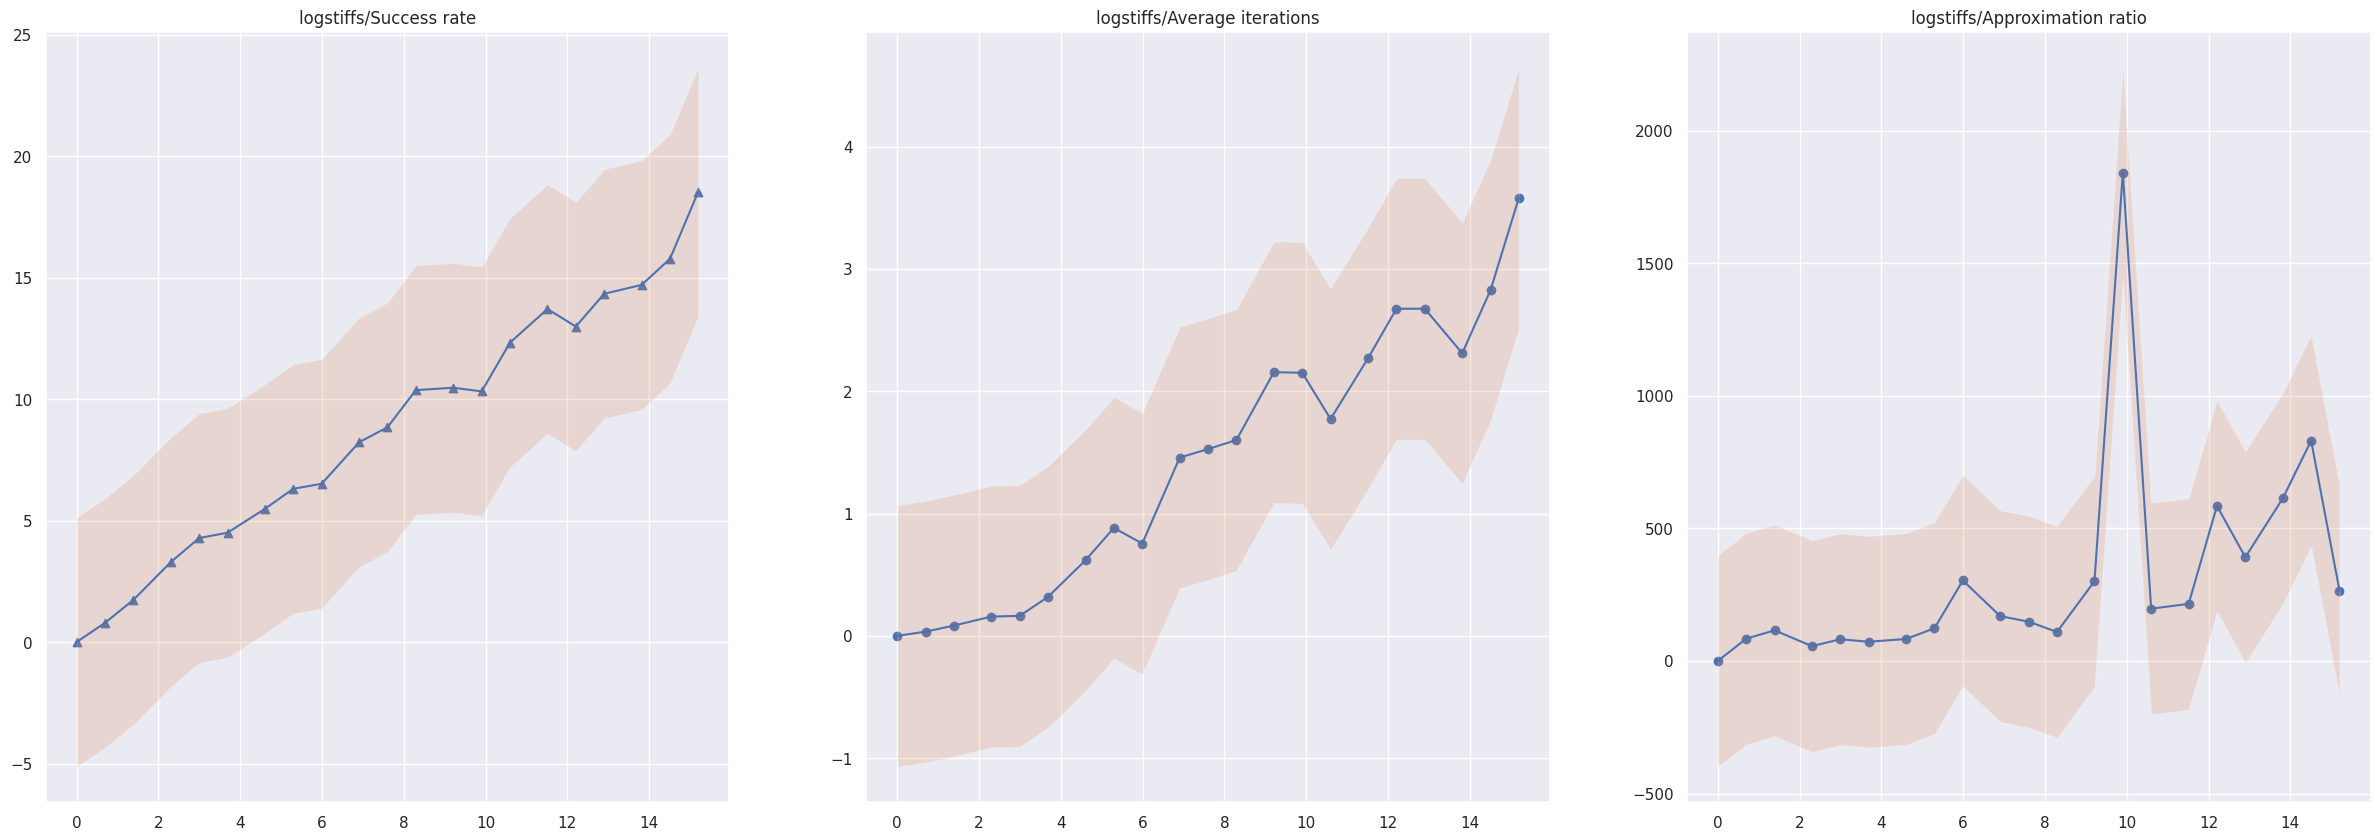

In [19]:

# the same plot in terms of linear function 

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

sns.set_theme(style = 'darkgrid')

sr_plot = axs[0]
its_plot = axs[1] 
approx_plot = axs[2]

def lf (a):
    return logstiffs/a 

sr_plot.scatter(logstiffs, lf(success_rates), marker = '^')
sr_plot.plot(logstiffs, lf(success_rates))
sr_plot.set_title('logstiffs/Success rate')
sr_plot.fill_between(logstiffs, lf(success_rates) - np.std(lf(success_rates)), lf(success_rates) + np.std(lf(success_rates)), alpha = alpha)

its_plot.scatter(logstiffs, lf(average_its))
its_plot.plot(logstiffs, lf(average_its))
its_plot.set_title('logstiffs/Average iterations')
its_plot.fill_between(logstiffs, lf(average_its) - np.std(lf(average_its)), lf(average_its) + np.std(lf(average_its)), alpha = alpha)

approx_plot.scatter(logstiffs, lf(approx_ratios))
approx_plot.plot(logstiffs, lf(approx_ratios))
approx_plot.set_title('logstiffs/Approximation ratio')
approx_plot.fill_between(logstiffs, lf(approx_ratios) - np.std(lf(approx_ratios)), lf(approx_ratios) + np.std(lf(approx_ratios)), alpha = alpha)

plt.show()